In [1]:
#Proceso_Contar Palabras
#trabajamos sobre out_proceso01.csv
#buscar palabras mas comunes en el tituto y la descripcion
#estandarizar palabras

In [2]:
#importando librerias que se van a utilizar
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#leyedo datos de properatti.csv
propiedades = pd.read_csv('/home/martin/Workspace/datascience-desafios/desafio1/data/out_proceso01.csv', decimal=".")
print(type(propiedades))
dfTemp = pd.DataFrame(propiedades[['titulo','descripcion']])

#dfTemp.to_dense().to_csv("/tmp/tmpTexto.txt", index = False, sep=',', encoding='utf-8')
    
#sin expensas
#con expensas
#apto credito
#pisos de ....
#no apta credito
#gas natural
#luz
#agua
#living comedor
#habitacion suite
#habitacion de servicio

#en pozo
#emprendimiento

#apto profesional
#apto credito

#buscar duplicados
#propiedades_analizar.duplicated('descripcion')

<class 'pandas.core.frame.DataFrame'>


Estas son las 10 palabras mas comunes

habitaciones :  129552
cocina :  99244
baño :  91974
ambientes :  90675
comedor :  80391
living :  57268
g b a :  50165
piso :  48641
departamento :  47344
balcon :  45090


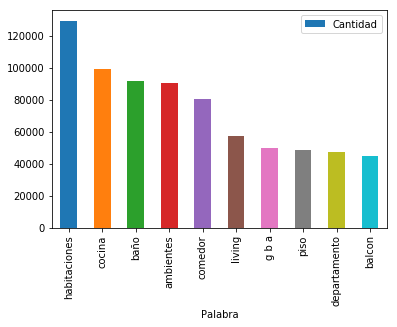

In [8]:
archivo = open('/home/martin/Workspace/datascience-desafios/desafio1/data/out_proceso01.csv', encoding="utf8")
texto = archivo.read()

#no contar estas palabras
nocontar = set(line.strip() for line in open('/home/martin/Workspace/datascience-desafios/desafio1/data/palabras_no_contar.txt'))

contarpalabras = {}

for palabra in texto.lower().split():
    palabra = palabra.replace("."," ")
    palabra = palabra.replace(","," ")
    palabra = palabra.replace(":"," ")
    palabra = palabra.replace("\""," ")
    palabra = palabra.replace("/"," ")
    palabra = palabra.replace("!"," ")
    palabra = palabra.replace("*"," ")
    palabra = palabra.replace("("," ")
    palabra = palabra.replace(")"," ")
    palabra = palabra.replace("["," ")
    palabra = palabra.replace("]"," ")
    palabra = palabra.replace("-"," ")
    palabra = palabra.replace("#"," ")
    palabra = palabra.replace("+"," ")
    palabra = palabra.replace("%"," ")
    palabra = palabra.replace("&"," ")
    palabra = palabra.replace("|"," ")
    palabra = palabra.replace("depto","departamento")
    palabra = palabra.replace("dorm","dormitorios")
    palabra = palabra.replace("amb","ambientes")
    palabra = palabra.replace("ambiente","ambientes")
    palabra = palabra.replace("ambientessientes","ambientes")
    palabra = palabra.replace("ambientess","ambientes")
    palabra = palabra.replace("ambientessiente","ambientes")
    palabra = palabra.replace("ambientesiente","ambientes")
    palabra = palabra.replace("monoambientessiente","monoambiente")
    palabra = palabra.replace("dormitorioss","habitaciones")
    palabra = palabra.replace("dormitorios ","habitaciones")
    palabra = palabra.replace("dormitoriositorios","habitaciones")
    palabra = palabra.replace("dormitoriositorio","habitaciones")
    palabra = palabra.replace("dormitorio","habitacion")
    palabra = palabra.replace("bano","baño")
    palabra = palabra.replace("banos","baños")
    palabra = palabra.replace("baa  o","baños")
    palabra = palabra.replace("usd","dolares")
    palabra = palabra.replace("u$d","dolares")
    palabra = palabra.replace("u$s","dolares")
    palabra = palabra.replace("$","pesos")
    palabra = palabra.replace("garage","cochera")
    palabra = palabra.replace("laundry","lavadero")
    palabra = palabra.replace("piscina","pileta")
    
    palabra = palabra.strip()
    
    if palabra not in nocontar:
        if palabra != "":
            if palabra not in contarpalabras:
                contarpalabras[palabra] = 1
            else:
                contarpalabras[palabra] += 1
            
n_print = 10
print("Estas son las {} palabras mas comunes\n".format(n_print))
contar_palabras = collections.Counter(contarpalabras)
for palabra, cantidad in contar_palabras.most_common(n_print):
    print(palabra, ": ", cantidad)

#se cierra la fila
archivo.close()

# df con las palabras mas comunes
lst = contar_palabras.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Palabra', 'Cantidad'])

# grafico de barras
df.plot.bar(x='Palabra',y='Cantidad')